# Datan analysointi K2020_2 - Tehtävät kerta 6

Palauta Optiman palautuslaatikkoon viimeistään su 29.3. Kirjoita palautuslaatikon kommenttikenttään, mitkä tehtävät olet tehnyt kokonaan/osittain.

Opiskelijan nimi:

## 1. Sekunnit aikaleimoiksi
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/gps.txt on gps-koordinaatteja ja niille aikaleimoja:

**t401.444483900_1490796_6272051_S36.**

  * **t401** = laitteen id (merkkijono)
  * **444483900** = UTC-aika sekunteina vuoden 2006 alusta eli 1.1.2006 00:00:00 (kokonaislukuna)
  * **1490796** = pituusaste*50000 (kokonaislukuna)
  * **6272051** = leveysaste*100000 (kokonaislukuna)
  * **S36** = nopeus (km/h) * 10 (kokonaislukuna)
  
laiteid:n jälkeen siis on aina piste ja muissa väleissä alaviiva. Nopeuslukeman edessä on aina kirjain S ja rivin lopussa piste.

Pura tiedosto DataFrameen, jossa on sarakkeet
  * laitteen id
  * aikaleima Timestampina Suomen aikaa joka on tuolloin ollut 2 tuntia edessä UTC-aikaa
  * pituusaste asteina
  * leveysaste asteina
  * nopeus km/h
  
Mallia alusta:
![malli1](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli1.png)

In [2]:
import pandas as pd
import datetime as dt

names=['id-aika', 'longitudi', 'latitudi', 'nopeus']
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/gps.txt', sep="_", decimal=',', names=names)

#df['id'], df['aikaero'] = df['id-aika'].str.split('.', 1).str
df['id'] = df['id-aika'].str.split('.').str.get(0)
df['aikaero'] = df['id-aika'].str.split('.').str.get(1).astype(int)

alkuaika = dt.datetime(2006,1,1,0,0,0)
df['aika'] = alkuaika + pd.to_timedelta(df['aikaero'], 's')

df['longitudi'] = df['longitudi'] / 50000
df['latitudi'] = df['latitudi'] / 100000
df['nopeus'] = df['nopeus'].str[1:].astype(float) / 10

newnames=['id', 'aika', 'longitudi', 'latitudi', 'nopeus']
df2 = df[newnames]
print(df2)

         id                aika  longitudi  latitudi  nopeus
0      t401 2020-02-01 11:45:00   29.81592  62.72051     3.6
1      t401 2020-02-01 11:45:02   29.81584  62.72052     7.6
2      t401 2020-02-01 11:45:04   29.81580  62.72054     5.4
3      t401 2020-02-01 11:45:06   29.81580  62.72054     0.0
4      t401 2020-02-01 11:45:08   29.81580  62.72054     0.0
...     ...                 ...        ...       ...     ...
44416  t439 2020-02-01 12:31:35   29.81634  62.71947     0.0
44417  t439 2020-02-01 12:31:37   29.81634  62.71947     0.0
44418  t439 2020-02-01 12:31:39   29.81634  62.71947     0.0
44419  t439 2020-02-01 12:31:41   29.81634  62.71947     0.0
44420  t439 2020-02-01 12:31:43   29.81634  62.71947     0.0

[44421 rows x 5 columns]


## 2. Jalkapalloa

Lue tiedosto http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/epl20200309.txt , jossa on Valioliigan ottelut kaudesta 1993-1994 tammikuuhun 2020 DataFrameen.

Listaa ensin minä kalenterikuukausina on pelattu eniten otteluita.  
Pitäisi tulla:
```
2017-12    69
2018-12    69
1994-04    68
2001-12    65
2013-12    64
1994-12    64
2006-12    64
```


Selvitä sitten minä **kalenteriviikkoina (ma-su)** on pelattu eniten otteluita.
Yritä saada otsikoitua viikot alkamispäivän mukaan, jolloin tulokseksi pitäisi saada:  
```
1994-12-26    31  
2005-12-26    27  
1993-12-27    27  
1993-08-16    22  
1993-08-23    22  
```
(huomioi että vuodenvaihteessa saman kalenteriviikon päivät ovat usein eri vuosina)

Laske vielä kuinka paljon otteluita on pelattu eri viikonpäivinä:  
```
ma     680
ti     505
ke     912
to      79
pe      99
la    6104
su    1953
```

In [3]:
import pandas as pd
import datetime

names=['id-aika', 'longitudi', 'latitudi', 'nopeus']
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/epl20200309.txt', sep=";", decimal='.')

df['Date']  = pd.to_datetime(df['Date'])
kkeniten = df.resample('M',on='Date', kind='period').size().sort_values(ascending=False).head(10)
print(kkeniten)

#viikoina ma-su
wkeniten = df.resample('W',on='Date', kind='period', label='left').size().sort_values(ascending=False).head(10)
print(wkeniten)

#vkonpäivinä
df['DoW'] = df['Date'].dt.dayofweek
df['Day'] = df['Date'].dt.day_name()

#test = df['DoW'].groupby([df['DoW']]).count()
#print(test)
pveniten = df.groupby('DoW')['DoW'].count()
print(pveniten)

#best = df['DoW'].dt.day_name
#print(best)

Date
2018-12    69
2017-12    69
1994-04    68
2001-12    65
2006-12    64
1994-12    64
2013-12    64
2019-12    63
2007-12    61
2014-12    60
Freq: M, dtype: int64
Date
1994-12-26/1995-01-01    31
1993-12-27/1994-01-02    27
2005-12-26/2006-01-01    27
1993-08-16/1993-08-22    22
1993-08-23/1993-08-29    22
2010-12-27/2011-01-02    21
2002-12-23/2002-12-29    21
1994-08-22/1994-08-28    21
2013-12-23/2013-12-29    21
2003-12-22/2003-12-28    20
Freq: W-SUN, dtype: int64
DoW
0     680
1     505
2     912
3      79
4      99
5    6104
6    1953
Name: DoW, dtype: int64


# 3. Liigavire
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal1k2020/kerta6/liiga.txt on SM-liigan (nyk. Liiga) runkosarjan ottelutukset kaudesta 2010-2011 kauden 2019-2020 maaliskuun alkuun.

huom. -sarakkeessa on merkintä JA tai VL, jos ottelu on ratkennut vasta jatkoajalla tai voittomaalikilpailussa.

Voittanut (enemmän maaleja tehnyt joukkue) saa 3 pistettä ja hävinnyt 0 pistettä, paitsi jos ottelu on ratkennut vasta jatkoajalla tai voittomaalikilpailussa, voittanut joukkue saa 2 pistettä ja hävinnyt yhden pisteen.


Laske jokaisen JYP:n ottelun kohdalle paljonko JYP on saanut pisteitä edellisestä 15 ottelustaan ja piirrä näistä tiedoista piste-viivakaavio, jossa vaaka-akselilla on ottelun päiväys.

(kaavioon tulee siis n. 6 kk katkoja kausien välillä koska runkosarjaotteluia ei pelata huhti-elokuussa)

Malli:
![malli3](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli3.png)

P:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


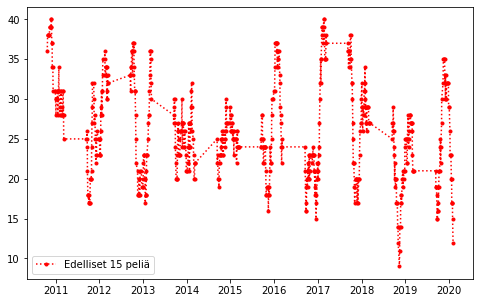

In [6]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal1k2020/kerta6/liiga.txt', sep=",", decimal='.')
df['KotiJ'] = df['ottelu'].str.split('-').str.get(0).str.strip()
df['VierasJ'] = df['ottelu'].str.split('-').str.get(1).str.strip()

jyp = 'JYP'
df = df[(df['KotiJ']==jyp) | (df['VierasJ']==jyp)]

df['KotiM'] = df['tulos'].str.split('-').str.get(0).str.strip().astype(int)
df['VierasM'] = df['tulos'].str.split('-').str.get(1).str.strip().astype(int)

df['KotiP'] = 0  # "alustetaan" pisteet nolliksi
df['VierasP'] = 0

df.loc[(df['huom'].isnull()) & (df['KotiM']>df['VierasM']), 'KotiP'] = 3 # kotivoitosta 3 pistettä jos NaN
df.loc[(df['huom'].notnull()) & (df['KotiM']>df['VierasM']), 'KotiP'] = 2 # kotivoitosta 2 pistettä jos JA/VL
df.loc[(df['huom'].notnull()) & (df['KotiM']<df['VierasM']), 'KotiP'] = 1 # kotitappiosta 1 piste jos JA/VL

df.loc[(df['huom'].isnull()) & (df['KotiM']<df['VierasM']), 'VierasP'] = 3 # vierasvoitosta 3 pistettä jos NaN
df.loc[(df['huom'].notnull()) & (df['KotiM']<df['VierasM']), 'VierasP'] = 2 # vierasvoitosta 2 pistettä jos JA/VL
df.loc[(df['huom'].notnull()) & (df['KotiM']>df['VierasM']), 'VierasP'] = 1 # vierastappiosta 1 piste jos JA/VL

df['JYPin Pisteet'] = 0
df.loc[(df['KotiJ']==jyp), 'JYPin Pisteet'] = df['KotiP']
df.loc[(df['VierasJ']==jyp), 'JYPin Pisteet'] = df['VierasP']
#print(df)

df2 = df[['pvm', 'JYPin Pisteet']]
df2['pvm'] = pd.to_datetime(df2['pvm'], dayfirst=True )
df2.set_index(['pvm'],inplace=True)

plt.figure()
plt.plot(df2['JYPin Pisteet'].rolling(15).sum(), 'r:o', markersize=3, label='Edelliset 15 peliä')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.legend(loc='lower left')
plt.show()

## 4. Kilometrit

Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/km.txt  on erään kuntoilijan päivittäisiä kilometrimääriä kesiltä 2015-2019.

Lue tiedosto ja laske jokaiselle päivälle toukokuun alusta lokakuun loppuun kuinka paljon enemmän tai vähemmän vuonna 2019 on kertynyt kilometreja kesän alusta verrattuna vuosiin 2015... 2018. Piirrä samaan kaavioon ero jokaiseen aikaisempaan vuoteen.

(huomaa että kilometrejä ei ole kertynyt läheskään jokainen päivä, mutta joka päivälle pitäisi saada ero laskettua)

Malli:
![malli4](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli4.png)

               km
pvm              
2015-05-31  19.97
2015-06-02  25.92
2015-06-08  21.49
2015-06-18  30.19
2015-06-20  30.22
...           ...
2019-10-03  15.09
2019-10-10  15.78
2019-10-15  16.49
2019-10-24  17.50
2019-10-26  17.49

[194 rows x 1 columns]
           pvm     km     sum
0   2018-05-12  20.30   20.30
1   2018-05-13  20.27   40.57
2   2018-05-14   0.00   40.57
3   2018-05-15  23.19   63.76
4   2018-05-16   0.00   63.76
..         ...    ...     ...
150 2018-10-09  17.45  904.12
151 2018-10-10  23.29  927.41
152 2018-10-11   0.00  927.41
153 2018-10-12  21.99  949.40
154 2018-10-13  23.29  972.69

[155 rows x 3 columns]
           pvm     km     sum
0   2019-05-13  17.48   17.48
1   2019-05-14   0.00   17.48
2   2019-05-15   0.00   17.48
3   2019-05-16   0.00   17.48
4   2019-05-17  23.36   40.84
..         ...    ...     ...
162 2019-10-22   0.00  693.68
163 2019-10-23   0.00  693.68
164 2019-10-24  17.50  711.18
165 2019-10-25   0.00  711.18
166 2019-10-26  17.49  728.6

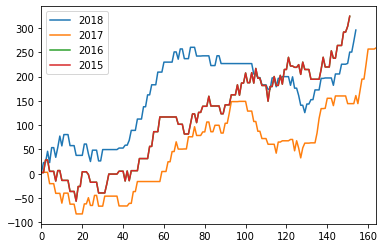

In [7]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/km.txt', sep=",", decimal='.')#, index_col='pvm')

#df['Vuosi'] = df['pvm'].str.split('-').str.get(0).str.strip().astype(int)
#df['Kk'] = df['pvm'].str.split('-').str.get(1).str.strip().astype(int)
#df['Pv'] = df['pvm'].str.split('-').str.get(2).str.strip().astype(int)
#df['end'] = df['pvm'].str.split('-').str.get(1).str.strip() + df['pvm'].str.split('-').str.get(2).str.strip()
#df['y'], df['m'], df['d'] = df['pvm'].str.split('-', 2).str

df['pvm']  = pd.to_datetime(df['pvm'])
df.set_index('pvm', inplace=True)
df.sort_index(ascending=True, inplace=True)
print(df)
#df['2019']
df2019 = df['2019-05-01':'2019-10'].resample('1D').asfreq().fillna(0)#.ffill()
df2018 = df['2018-05-01':'2018-10'].resample('1D').asfreq().fillna(0)
df2017 = df['2017-05-01':'2017-10'].resample('1D').asfreq().fillna(0)
df2016 = df['2016-05-01':'2016-10'].resample('1D').asfreq().fillna(0)
df2015 = df['2015-05-01':'2015-10'].resample('1D').asfreq().fillna(0)
#df2018.set_index('end', inplace = True)
#df2019.set_index('end', inplace = True)
df2019 = df2019.reset_index()
df2018 = df2018.reset_index()
df2017 = df2017.reset_index()
df2016 = df2016.reset_index()
df2015 = df2015.reset_index()

df2019['sum'] = df2019['km'].cumsum()
df2018['sum'] = df2018['km'].cumsum()
df2017['sum'] = df2017['km'].cumsum()
df2016['sum'] = df2016['km'].cumsum()
df2015['sum'] = df2015['km'].cumsum()

print(df2018)
print(df2019)
#print(df2019b)
print('test')
df2018['erotus'] = df2018['sum'] - df2019['sum']
df2017['erotus'] = df2017['sum'] - df2019['sum']
df2016['erotus'] = df2016['sum'] - df2019['sum']
df2015['erotus'] = df2015['sum'] - df2019['sum']
print(df2018)
#df2018roll = df2018['km'].rolling('1d').sum() - df2019['km'].rolling('1d').sum()
#print(df2018roll)
#df2018['km'].rolling(1).sum().plot(label='roll1')
#df2019['km'].rolling(1, center=True).sum().plot(label='roll2')
#(df2018['km'].rolling('1d').sum()).plot(label='roll3')

df2018['erotus'].plot(label='2018')
df2016['erotus'].plot(label='2017')
df2015['erotus'].plot(label='2016')
df2015['erotus'].plot(label='2015')
plt.legend()
plt.show()

## 5. access.log
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/accesslog.zip on eräästä access.log-tiedostosta poimittuja tietoja (ip-osoite, aika ja eventid).

Tee tiedoista kaavio, joka kertoo kuinka monta **eri ip-osoitetta** on ollut kussakin kuudessa eventissä 5 minuutin jaksoissa näytteistettynä (eli esim montako eri ip-osoitetta on välillä 11:30:00-11:34:59).

Voit joutua käyttämään omaa date_parser-funktiota. 

Malli:  
![malli5](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli5.png)

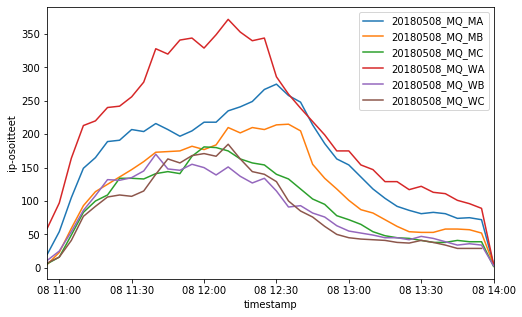

In [3]:
import pandas as pd
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
#import seaborn as sns

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/accesslog.zip', sep=",", decimal='.')#, nrows=10000)

#df['date'], df['h'], df['min'], df['s'] = df['timestamp'].str.split(':', 3).str
#df  = pd.to.datetime(df['timestamp'], format='%d:%b/%Y:%H:%M:%S')
df['dt'] = df['timestamp'].str.replace(':', ' ', 1)
df['timestamp'] = df['dt'].map(lambda x: parse(x))
df['timestamp']  = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df = df['2018-05-08 10:50:00':'2018-05-08 14:00:00']
df.sort_index(ascending=True, inplace=True)
#print(df)

df2 = pd.DataFrame(df.groupby('eventid').resample('5min')['ip'].nunique())
df2.reset_index(inplace=True)
#print(df2)

dfMA = df2.loc[(df2['eventid']=='20180508_MQ_MA')]
dfMA.set_index('timestamp', inplace=True)
#print(dfMA)
dfMB = df2.loc[(df2['eventid']=='20180508_MQ_MB')]
dfMB.set_index('timestamp', inplace=True)
dfMC = df2.loc[(df2['eventid']=='20180508_MQ_MC')]
dfMC.set_index('timestamp', inplace=True)
dfWA = df2.loc[(df2['eventid']=='20180508_MQ_WA')]
dfWA.set_index('timestamp', inplace=True)
dfWB = df2.loc[(df2['eventid']=='20180508_MQ_WB')]
dfWB.set_index('timestamp', inplace=True)
dfWC = df2.loc[(df2['eventid']=='20180508_MQ_WC')]
dfWC.set_index('timestamp', inplace=True)

plt.figure()
plt.plot(dfMA['ip'], label='20180508_MQ_MA')
plt.plot(dfMB['ip'], label='20180508_MQ_MB')
plt.plot(dfMC['ip'], label='20180508_MQ_MC')
plt.plot(dfWA['ip'], label='20180508_MQ_WA')
plt.plot(dfWB['ip'], label='20180508_MQ_WB')
plt.plot(dfWC['ip'], label='20180508_MQ_WC')

fig = plt.gcf()
fig.set_size_inches(8,5)
xMin = datetime.datetime(2018,5,8,10,55,0)
xMax = datetime.datetime(2018,5,8,14,0,0)
plt.xlim(xMin, xMax)
plt.xlabel('timestamp')
plt.ylabel('ip-osoitteet')
plt.legend()
plt.show()